# Check the lat lon locations of each station

## Description

This program loads the 1a_filtered_repeat_stations_data.csv file ro check the stations locations:
- Check if any latitude and longitude values are outside of range (lat -90 to 90, lon -180 to 180 dd)
- Plot the each state and their stations locations to see if they are indeed correct, remove stations with wrong locations from future analysis

In [1]:
# Import modules
import mestrado_module as mm
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
from shapely.geometry import Point, Polygon

In [2]:
# Paths
input_folder: Path = Path(mm.path_pipeline_01_data_processing)
#output_folder: Path = Path("../02_pipeline/01_data_processing")
output_folder: Path = Path(mm.path_pipeline_01_data_processing)

# Files
input_file: Path = Path(mm.output_1a_code_filtered_data)
#output_data_file: Path = Path("pre_filtered_stations_data.csv")
output_file: Path = Path(mm.output_1b_code_processed_data)

# Shapefile info
#shapefile_folder: Path = Path("../00_data/external/shapefiles_data/")
shapefile_folder: Path = Path(mm.path_brazil_shapefile)
shapefile_file: Path = Path(mm.brazil_shapefile)

# Figure style
sns.set_style("darkgrid")

# Save figures
figs_folder: Path = Path("../02_pipeline/01_data_processing/figures_location")

## Read data

In [3]:
# Load data with Pandas
df = pd.read_csv(input_folder / input_file)
df

,Code,Lat_dd,Lon_dd,Time_dy,D_dd,I_dd,H_nT,F_nT,X_nT,Y_nT,Z_nT,State,Region,RS_name
0,AC_CZS,-7.637,-72.670,1958.529,2.683,11.281,29097.0,29671.0,29065.0,1362.0,5804.0,AC,N,CRUZEIRO DO SUL
1,AC_CZS,-7.637,-72.670,1965.848,1.824,11.277,28662.0,29227.0,28648.0,912.0,5715.0,AC,N,CRUZEIRO DO SUL
2,AC_CZS,-7.620,-72.670,1978.640,-0.035,11.026,27835.0,28359.0,27835.0,-17.0,5423.0,AC,N,CRUZEIRO DO SUL
3,AC_CZS,-7.599,-72.770,1986.279,-1.343,10.685,27402.0,27886.0,27394.0,-642.0,5170.0,AC,N,CRUZEIRO DO SUL
4,AC_CZS,-7.599,-72.770,1989.503,-1.847,10.468,27222.0,27683.0,27208.0,-877.0,5029.0,AC,N,CRUZEIRO DO SUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,TO_PNL,-10.727,-48.408,1985.119,-18.142,-7.084,24938.0,25130.0,23698.0,-7765.0,-3099.0,TO,N,PORTO NACIONAL
1085,TO_PNL,-10.727,-48.408,1986.670,-18.325,-7.556,24865.0,25083.0,23604.0,-7817.0,-3298.0,TO,N,PORTO NACIONAL
1086,TO_PNL,-10.727,-48.408,1995.817,-19.315,-10.562,24358.0,24778.0,22987.0,-8056.0,-4541.0,TO,N,PORTO NACIONAL
1087,TO_PNL,-10.721,-48.401,2003.702,-20.117,-13.008,23896.0,24526.0,22438.0,-8218.0,-5520.0,TO,N,PORTO NACIONAL


## Check latitude values

In [4]:
# Check LAT values in ascending order (they must be between -90 to 90, values out of this range will be excluded)
df_check_lat = df
df_check_lat.sort_values(["Lat_dd"], ascending=True)

,Code,Lat_dd,Lon_dd,Time_dy,D_dd,I_dd,H_nT,F_nT,X_nT,Y_nT,Z_nT,State,Region,RS_name
864,RS_BCH_A,-33.753,-53.367,1953.838,-4.552,-30.499,21706.0,25192.0,21637.0,-1722.0,-12785.0,RS,S,BARRA DO CHUI (RS) A
865,RS_BCH_A,-33.753,-53.367,1960.036,-5.386,-31.266,21221.0,24827.0,21127.0,-1991.0,-12885.0,RS,S,BARRA DO CHUI (RS) A
866,RS_BCH_A,-33.753,-53.367,1965.029,-6.282,-31.923,20955.0,24690.0,20830.0,-2293.0,-13055.0,RS,S,BARRA DO CHUI (RS) A
867,RS_BCH_A,-33.753,-53.367,1965.379,-6.289,-31.808,20903.0,24597.0,20777.0,-2289.0,-12964.0,RS,S,BARRA DO CHUI (RS) A
868,RS_BCH_A,-33.753,-53.367,1974.239,-7.643,-33.138,20188.0,24110.0,20009.0,-2685.0,-13179.0,RS,S,BARRA DO CHUI (RS) A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,AP_OPQ,3.837,-51.830,1988.489,-17.180,20.218,28165.0,30015.0,26908.0,-8319.0,10372.0,AP,N,OIAPOQUE
115,AP_OPQ,3.837,-51.830,1984.614,-16.833,21.302,28249.0,30321.0,27039.0,-8180.0,11015.0,AP,N,OIAPOQUE
118,AP_OPQ,3.861,-51.796,2009.527,-18.518,13.810,27772.0,28598.0,6826.0,NaN,NaN,AP,N,OIAPOQUE
117,AP_OPQ,3.861,-51.796,2004.489,-18.295,15.423,27899.0,28942.0,26489.0,-8758.0,7696.0,AP,N,OIAPOQUE


In [5]:
# Check which values are outside the range. They must be between -90 to 90 degrees, values out of this range will be excluded
lat_out_values = df_check_lat["Lat_dd"].between(-90.0, 90.0, inclusive="both")

# Add a column to the current dataframe with True or False to mark which values belong to the specified range
df_check_lat["lat_range_values"] = lat_out_values
df_check_lat

,Code,Lat_dd,Lon_dd,Time_dy,D_dd,I_dd,H_nT,F_nT,X_nT,Y_nT,Z_nT,State,Region,RS_name,lat_range_values
0,AC_CZS,-7.637,-72.670,1958.529,2.683,11.281,29097.0,29671.0,29065.0,1362.0,5804.0,AC,N,CRUZEIRO DO SUL,True
1,AC_CZS,-7.637,-72.670,1965.848,1.824,11.277,28662.0,29227.0,28648.0,912.0,5715.0,AC,N,CRUZEIRO DO SUL,True
2,AC_CZS,-7.620,-72.670,1978.640,-0.035,11.026,27835.0,28359.0,27835.0,-17.0,5423.0,AC,N,CRUZEIRO DO SUL,True
3,AC_CZS,-7.599,-72.770,1986.279,-1.343,10.685,27402.0,27886.0,27394.0,-642.0,5170.0,AC,N,CRUZEIRO DO SUL,True
4,AC_CZS,-7.599,-72.770,1989.503,-1.847,10.468,27222.0,27683.0,27208.0,-877.0,5029.0,AC,N,CRUZEIRO DO SUL,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,TO_PNL,-10.727,-48.408,1985.119,-18.142,-7.084,24938.0,25130.0,23698.0,-7765.0,-3099.0,TO,N,PORTO NACIONAL,True
1085,TO_PNL,-10.727,-48.408,1986.670,-18.325,-7.556,24865.0,25083.0,23604.0,-7817.0,-3298.0,TO,N,PORTO NACIONAL,True
1086,TO_PNL,-10.727,-48.408,1995.817,-19.315,-10.562,24358.0,24778.0,22987.0,-8056.0,-4541.0,TO,N,PORTO NACIONAL,True
1087,TO_PNL,-10.721,-48.401,2003.702,-20.117,-13.008,23896.0,24526.0,22438.0,-8218.0,-5520.0,TO,N,PORTO NACIONAL,True


In [6]:
# Get names of indexes for which column lon_out_values has value False
lat_index = df_check_lat[df_check_lat["lat_range_values"] == False].index
#print(lat_index)

# Delete these row indexes from dataFrame
df_check_lat_2 = df_check_lat.drop(lat_index, inplace=False)

In [7]:
# Check if any value was dropped
df_check_lat.info()
df_check_lat_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              1089 non-null   object 
 1   Lat_dd            1089 non-null   float64
 2   Lon_dd            1089 non-null   float64
 3   Time_dy           1089 non-null   float64
 4   D_dd              1089 non-null   float64
 5   I_dd              1089 non-null   float64
 6   H_nT              1089 non-null   float64
 7   F_nT              1089 non-null   float64
 8   X_nT              1089 non-null   float64
 9   Y_nT              1003 non-null   float64
 10  Z_nT              1002 non-null   float64
 11  State             1089 non-null   object 
 12  Region            1089 non-null   object 
 13  RS_name           1089 non-null   object 
 14  lat_range_values  1089 non-null   bool   
dtypes: bool(1), float64(10), object(4)
memory usage: 120.3+ KB
<class 'pandas.core.frame.Data

## Check Longitude values

In [8]:
# Check LON values, ascending order (they must be between -180 to 180, values out of this range will be excluded)
df_check_lon = df_check_lat_2
df_check_lon.sort_values(["Lon_dd"], ascending=True)

,Code,Lat_dd,Lon_dd,Time_dy,D_dd,I_dd,H_nT,F_nT,X_nT,Y_nT,Z_nT,State,Region,RS_name,lat_range_values
908,RS_PAL,-30.026,-511702.000,2018.831,-16.986,-406.647,17221.000,22703.0,16470.0,-5031.0,-14794.0,RS,S,PORTO ALEGRE,True
19,AC_RBC,-9.869,-67896.000,2006.866,-7.753,3.331,25288.000,25331.0,1472.0,NaN,NaN,AC,N,RIO BRANCO,True
571,MT_NSJ_A,-14.964,-52264.000,2007.567,-17.917,-16.596,22631.000,23615.0,-6745.0,NaN,NaN,MT,CO,NOVO SAO JOAQUIM A,True
988,SC_FLO,-27.664,-485.494,2018.825,-19.980,-401.083,17.426,22783.0,16377.0,-5954.0,-14667.0,SC,S,FLORIANOPOLIS,True
3,AC_CZS,-7.599,-72.770,1986.279,-1.343,10.685,27402.000,27886.0,27394.0,-642.0,5170.0,AC,N,CRUZEIRO DO SUL,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,PE_FNH,-3.860,-32.430,1952.250,-21.541,-0.333,27712.000,27713.0,25776.0,-10175.0,-161.0,PE,NE,FERNANDO DE NORONHA,True
647,PE_FNH,-3.860,-32.430,1952.546,-21.614,-0.199,27429.000,27430.0,25501.0,-10103.0,-95.0,PE,NE,FERNANDO DE NORONHA,True
648,PE_FNH,-3.850,-32.417,1988.170,-22.062,-13.602,25987.000,26737.0,24084.0,-9761.0,-6287.0,PE,NE,FERNANDO DE NORONHA,True
649,PE_FNH,-3.850,-32.417,1988.170,-21.166,-18.111,25424.000,26750.0,23709.0,-9180.0,-8315.0,PE,NE,FERNANDO DE NORONHA,True


In [9]:
# Check which values are outside the range. They must be between -180 to 180, values out of this range will be excluded
lon_out_values = df_check_lon["Lon_dd"].between(-180.0, 180.0, inclusive="both")

# Add a column to the current dataframe with True or False to mark which values belong to the specified range
df_check_lon["lon_range_values"] = lon_out_values
df_check_lon

,Code,Lat_dd,Lon_dd,Time_dy,D_dd,I_dd,H_nT,F_nT,X_nT,Y_nT,Z_nT,State,Region,RS_name,lat_range_values,lon_range_values
0,AC_CZS,-7.637,-72.670,1958.529,2.683,11.281,29097.0,29671.0,29065.0,1362.0,5804.0,AC,N,CRUZEIRO DO SUL,True,True
1,AC_CZS,-7.637,-72.670,1965.848,1.824,11.277,28662.0,29227.0,28648.0,912.0,5715.0,AC,N,CRUZEIRO DO SUL,True,True
2,AC_CZS,-7.620,-72.670,1978.640,-0.035,11.026,27835.0,28359.0,27835.0,-17.0,5423.0,AC,N,CRUZEIRO DO SUL,True,True
3,AC_CZS,-7.599,-72.770,1986.279,-1.343,10.685,27402.0,27886.0,27394.0,-642.0,5170.0,AC,N,CRUZEIRO DO SUL,True,True
4,AC_CZS,-7.599,-72.770,1989.503,-1.847,10.468,27222.0,27683.0,27208.0,-877.0,5029.0,AC,N,CRUZEIRO DO SUL,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,TO_PNL,-10.727,-48.408,1985.119,-18.142,-7.084,24938.0,25130.0,23698.0,-7765.0,-3099.0,TO,N,PORTO NACIONAL,True,True
1085,TO_PNL,-10.727,-48.408,1986.670,-18.325,-7.556,24865.0,25083.0,23604.0,-7817.0,-3298.0,TO,N,PORTO NACIONAL,True,True
1086,TO_PNL,-10.727,-48.408,1995.817,-19.315,-10.562,24358.0,24778.0,22987.0,-8056.0,-4541.0,TO,N,PORTO NACIONAL,True,True
1087,TO_PNL,-10.721,-48.401,2003.702,-20.117,-13.008,23896.0,24526.0,22438.0,-8218.0,-5520.0,TO,N,PORTO NACIONAL,True,True


In [10]:
# Get names of indexes for which column lon_out_values has value False
lon_index = df_check_lon[df_check_lon["lon_range_values"] == False].index
lon_index

# Delete these row indexes from dataFrame
df_check_lon_2 = df_check_lon.drop(lon_index, inplace=False)

In [11]:
# Check if any value was dropped
df_check_lon.info()
df_check_lon_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1088
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              1089 non-null   object 
 1   Lat_dd            1089 non-null   float64
 2   Lon_dd            1089 non-null   float64
 3   Time_dy           1089 non-null   float64
 4   D_dd              1089 non-null   float64
 5   I_dd              1089 non-null   float64
 6   H_nT              1089 non-null   float64
 7   F_nT              1089 non-null   float64
 8   X_nT              1089 non-null   float64
 9   Y_nT              1003 non-null   float64
 10  Z_nT              1002 non-null   float64
 11  State             1089 non-null   object 
 12  Region            1089 non-null   object 
 13  RS_name           1089 non-null   object 
 14  lat_range_values  1089 non-null   bool   
 15  lon_range_values  1089 non-null   bool   
dtypes: bool(2), float64(10), object(4)
memory 

In [12]:
# Create a dataframe to save all the alterations from the checks
df_checked = df_check_lon_2

In [13]:
# OLD CODE
# Print wrong values found
# df.iloc[[767, 827, 652, 406], [0, 2]]

# Delete rows with wrong LON values
# df_lon = df.drop([767, 827, 652, 406])
# df_lon

## Plot states and their stations location (lat lon) to check if they are correct

In [14]:
# Create a geodataframe with info from the shapefile
gdf = gpd.read_file(shapefile_folder / shapefile_file)
# gdf

# Check the used projection in the shapefile (EPSG:4326 is the WGS84 latitude-longitude projection)
gdf.crs  # look here https://epsg.io/4674, projection used in latin america

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### North region

In [15]:
# PLOT ACRE
# Create dataframe for state
d_ac = df_checked.loc[(df_checked["State"] == "AC")]
#d_ac

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
ac_lat_lon_points = [Point(xy) for xy in zip(d_ac["Lon_dd"], d_ac["Lat_dd"])]

# Create the geodataframe
ac_geo_lat_lon = gpd.GeoDataFrame(geometry=ac_lat_lon_points)
ac_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "AC"].plot(ax=ax, color="gray", edgecolor="black")
ac_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Acre", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"acre_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [16]:
# PLOT AMAPA
# Create dataframe for state
d_ap = df_checked.loc[(df_checked["State"] == "AP")]
#d_ap

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
ap_lat_lon_points = [Point(xy) for xy in zip(d_ap["Lon_dd"], d_ap["Lat_dd"])]

# Create the geodataframe
ap_geo_lat_lon = gpd.GeoDataFrame(geometry=ap_lat_lon_points)
#ap_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "AP"].plot(ax=ax, color="gray", edgecolor="black")
ap_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Amapa", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"amapa_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [17]:
## PLOT AMAZONAS
# Create dataframe for state
d_am = df_checked.loc[(df_checked["State"] == "AM")]
#d_am

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
am_lat_lon_points = [Point(xy) for xy in zip(d_am["Lon_dd"], d_am["Lat_dd"])]

# Create the geodataframe
am_geo_lat_lon = gpd.GeoDataFrame(geometry=am_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "AM"].plot(ax=ax, color="gray", edgecolor="black")
am_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Amazonas", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"amazonas_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [18]:
## PLOT PARA
# Create dataframe for state
d_pa = df_checked.loc[(df_checked["State"] == "PA")]
#d_pa

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
pa_lat_lon_points = [Point(xy) for xy in zip(d_pa["Lon_dd"], d_pa["Lat_dd"])]

# Create the geodataframe
pa_geo_lat_lon = gpd.GeoDataFrame(geometry=pa_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "PA"].plot(ax=ax, color="gray", edgecolor="black")
pa_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Pará", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"para_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [19]:
## PLOT RONDONIA
# Create dataframe for state
d_ro = df_checked.loc[(df_checked["State"] == "RO")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
ro_lat_lon_points = [Point(xy) for xy in zip(d_ro["Lon_dd"], d_ro["Lat_dd"])]

# Create the geodataframe
ro_geo_lat_lon = gpd.GeoDataFrame(geometry=ro_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "RO"].plot(ax=ax, color="gray", edgecolor="black")
ro_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Rondonia", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"rondonia_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [20]:
## PLOT RORAIMA
# Create dataframe for state
d_rr = df_checked.loc[(df_checked["State"] == "RR")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
rr_lat_lon_points = [Point(xy) for xy in zip(d_rr["Lon_dd"], d_rr["Lat_dd"])]

# Create the geodataframe
rr_geo_lat_lon = gpd.GeoDataFrame(geometry=rr_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "RR"].plot(ax=ax, color="gray", edgecolor="black")
rr_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Roraima", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"roraima_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [21]:
## PLOT TOCANTINS
# Create dataframe for state
d_to = df_checked.loc[(df_checked["State"] == "TO")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
to_lat_lon_points = [Point(xy) for xy in zip(d_to["Lon_dd"], d_to["Lat_dd"])]

# Create the geodataframe
to_geo_lat_lon = gpd.GeoDataFrame(geometry=to_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "TO"].plot(ax=ax, color="gray", edgecolor="black")
to_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Tocantins", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"tocantins_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

### Northeast region

In [22]:
## PLOT ALAGOAS
# Create dataframe for state
d_al = df_checked.loc[(df_checked["State"] == "AL")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
al_lat_lon_points = [Point(xy) for xy in zip(d_al["Lon_dd"], d_al["Lat_dd"])]

# Create the geodataframe
al_geo_lat_lon = gpd.GeoDataFrame(geometry=al_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "AL"].plot(ax=ax, color="gray", edgecolor="black")
al_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Alagoas", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"alagoas_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [23]:
## PLOT BAHIA
# Create dataframe for state
d_ba = df_checked.loc[(df_checked["State"] == "BA")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
ba_lat_lon_points = [Point(xy) for xy in zip(d_ba["Lon_dd"], d_ba["Lat_dd"])]

# Create the geodataframe
ba_geo_lat_lon = gpd.GeoDataFrame(geometry=ba_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "BA"].plot(ax=ax, color="gray", edgecolor="black")
ba_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Bahia", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"bahia_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [24]:
## PLOT CEARA
# Create dataframe for state
d_ce = df_checked.loc[(df_checked["State"] == "CE")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
ce_lat_lon_points = [Point(xy) for xy in zip(d_ce["Lon_dd"], d_ce["Lat_dd"])]

# Create the geodataframe
ce_geo_lat_lon = gpd.GeoDataFrame(geometry=ce_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "CE"].plot(ax=ax, color="gray", edgecolor="black")
ce_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Ceara", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"ceara_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [25]:
## PLOT MARANHÃO
# Create dataframe for state
d_ma = df_checked.loc[(df_checked["State"] == "MA")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
ma_lat_lon_points = [Point(xy) for xy in zip(d_ma["Lon_dd"], d_ma["Lat_dd"])]

# Create the geodataframe
ma_geo_lat_lon = gpd.GeoDataFrame(geometry=ma_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "MA"].plot(ax=ax, color="gray", edgecolor="black")
ma_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Maranhão", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"maranhao_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [26]:
## PLOT PARAIBA
# Create dataframe for state
d_pb = df_checked.loc[(df_checked["State"] == "PB")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
pb_lat_lon_points = [Point(xy) for xy in zip(d_pb["Lon_dd"], d_pb["Lat_dd"])]

# Create the geodataframe
pb_geo_lat_lon = gpd.GeoDataFrame(geometry=pb_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "PB"].plot(ax=ax, color="gray", edgecolor="black")
pb_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Paraiba", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"paraiba_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

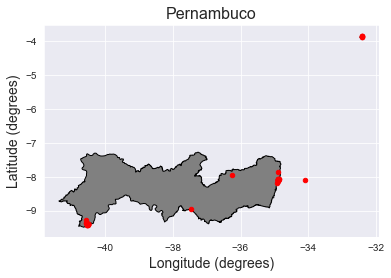

In [27]:
## PLOT PERNAMBUCO
# Create dataframe for state
d_pe = df_checked.loc[(df_checked["State"] == "PE")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
pe_lat_lon_points = [Point(xy) for xy in zip(d_pe["Lon_dd"], d_pe["Lat_dd"])]

# Create the geodataframe
pe_geo_lat_lon = gpd.GeoDataFrame(geometry=pe_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "PE"].plot(ax=ax, color="gray", edgecolor="black")
pe_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Pernambuco", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"pernambuco_locations_erro.png", dpi=300, bbox_inches="tight")
plt.show()
#plt.close()

In [28]:
## PLOT PIAUI
# Create dataframe for state
d_pi = df_checked.loc[(df_checked["State"] == "PI")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
pi_lat_lon_points = [Point(xy) for xy in zip(d_pi["Lon_dd"], d_pi["Lat_dd"])]

# Create the geodataframe
pi_geo_lat_lon = gpd.GeoDataFrame(geometry=pi_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "PI"].plot(ax=ax, color="gray", edgecolor="black")
pi_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Piaui", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"piaui_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [29]:
## PLOT RIO GRANDE DO NORTE
# Create dataframe for state
d_rn = df_checked.loc[(df_checked["State"] == "RN")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
rn_lat_lon_points = [Point(xy) for xy in zip(d_rn["Lon_dd"], d_rn["Lat_dd"])]

# Create the geodataframe
rn_geo_lat_lon = gpd.GeoDataFrame(geometry=rn_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "RN"].plot(ax=ax, color="gray", edgecolor="black")
rn_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Rio Grande do Norte", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"rn_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [30]:
## PLOT SERGIPE
# Create dataframe for state
d_se = df_checked.loc[(df_checked["State"] == "SE")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
se_lat_lon_points = [Point(xy) for xy in zip(d_se["Lon_dd"], d_se["Lat_dd"])]

# Create the geodataframe
se_geo_lat_lon = gpd.GeoDataFrame(geometry=se_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "SE"].plot(ax=ax, color="gray", edgecolor="black")
se_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Sergipe", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"sergipe_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

### Centro Oeste region

In [31]:
## PLOT GOIAS
# Create dataframe for state
d_go = df_checked.loc[(df_checked["State"] == "GO")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
go_lat_lon_points = [Point(xy) for xy in zip(d_go["Lon_dd"], d_go["Lat_dd"])]

# Create the geodataframe
go_geo_lat_lon = gpd.GeoDataFrame(geometry=go_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "GO"].plot(ax=ax, color="gray", edgecolor="black")
go_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Goias", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"goias_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [32]:
## PLOT MATO GROSSO DO SUL
# Create dataframe for state
d_ms = df_checked.loc[(df_checked["State"] == "MS")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
ms_lat_lon_points = [Point(xy) for xy in zip(d_ms["Lon_dd"], d_ms["Lat_dd"])]

# Create the geodataframe
ms_geo_lat_lon = gpd.GeoDataFrame(geometry=ms_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "MS"].plot(ax=ax, color="gray", edgecolor="black")
ms_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Mato Grosso do Sul", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"matogrossosul_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

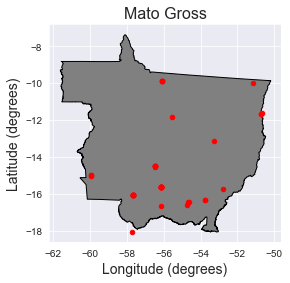

In [33]:
## PLOT MATO GROSSO
# Create dataframe for state
d_mt = df_checked.loc[(df_checked["State"] == "MT")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
mt_lat_lon_points = [Point(xy) for xy in zip(d_mt["Lon_dd"], d_mt["Lat_dd"])]

# Create the geodataframe
mt_geo_lat_lon = gpd.GeoDataFrame(geometry=mt_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "MT"].plot(ax=ax, color="gray", edgecolor="black")
mt_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Mato Gross", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"matogrosso_locations_erro.png", dpi=300, bbox_inches="tight")
plt.show()
#plt.close()

### Southeast region

In [34]:
## PLOT ESPIRITO SANTO
# Create dataframe for state
d_es = df_checked.loc[(df_checked["State"] == "ES")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
es_lat_lon_points = [Point(xy) for xy in zip(d_es["Lon_dd"], d_es["Lat_dd"])]

# Create the geodataframe
es_geo_lat_lon = gpd.GeoDataFrame(geometry=es_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "ES"].plot(ax=ax, color="gray", edgecolor="black")
es_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Espirito Santo", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"espiritosanto_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [35]:
## PLOT MINAS GERAIS
# Create dataframe for state
d_mg = df_checked.loc[(df_checked["State"] == "MG")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
mg_lat_lon_points = [Point(xy) for xy in zip(d_mg["Lon_dd"], d_mg["Lat_dd"])]

# Create the geodataframe
mg_geo_lat_lon = gpd.GeoDataFrame(geometry=mg_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "MG"].plot(ax=ax, color="gray", edgecolor="black")
mg_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Minas Gerais", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"minasgerais_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [36]:
## PLOT RIO DE JANEIRO
# Create dataframe for state
d_rj = df_checked.loc[(df_checked["State"] == "RJ")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
rj_lat_lon_points = [Point(xy) for xy in zip(d_rj["Lon_dd"], d_rj["Lat_dd"])]

# Create the geodataframe
rj_geo_lat_lon = gpd.GeoDataFrame(geometry=rj_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "RJ"].plot(ax=ax, color="gray", edgecolor="black")
rj_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Rio de Janeiro", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"rj_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

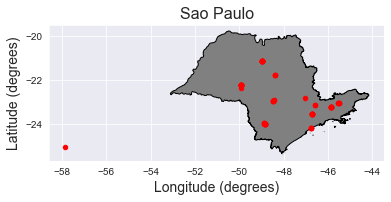

In [37]:
## PLOT SÃO PAULO
# Create dataframe for state
d_sp = df_checked.loc[(df_checked["State"] == "SP")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
sp_lat_lon_points = [Point(xy) for xy in zip(d_sp["Lon_dd"], d_sp["Lat_dd"])]

# Create the geodataframe
sp_geo_lat_lon = gpd.GeoDataFrame(geometry=sp_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "SP"].plot(ax=ax, color="gray", edgecolor="black")
sp_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Sao Paulo", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"saopaulo_locations_erro.png", dpi=300, bbox_inches="tight")
plt.show()
#plt.close()

### South region

In [38]:
## PLOT PARANÁ
# Create dataframe for state
d_pr = df_checked.loc[(df_checked["State"] == "PR")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
pr_lat_lon_points = [Point(xy) for xy in zip(d_pr["Lon_dd"], d_pr["Lat_dd"])]

# Create the geodataframe
pr_geo_lat_lon = gpd.GeoDataFrame(geometry=pr_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "PR"].plot(ax=ax, color="gray", edgecolor="black")
pr_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Parana", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"parana_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [39]:
## PLOT SANTA CATARINA
# Create dataframe for state
d_sc = df_checked.loc[(df_checked["State"] == "SC")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
sc_lat_lon_points = [Point(xy) for xy in zip(d_sc["Lon_dd"], d_sc["Lat_dd"])]

# Create the geodataframe
sc_geo_lat_lon = gpd.GeoDataFrame(geometry=sc_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "SC"].plot(ax=ax, color="gray", edgecolor="black")
sc_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Santa Catarina", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"sc_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

In [40]:
## PLOT RIO GRANDE DO SUL
# Create dataframe for state
d_rs = df_checked.loc[(df_checked["State"] == "RS")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
rs_lat_lon_points = [Point(xy) for xy in zip(d_rs["Lon_dd"], d_rs["Lat_dd"])]

# Create the geodataframe
rs_geo_lat_lon = gpd.GeoDataFrame(geometry=rs_lat_lon_points)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "RS"].plot(ax=ax, color="gray", edgecolor="black")
rs_geo_lat_lon.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Rio Grande do Sul", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"rs_locations.png", dpi=300, bbox_inches="tight")
#plt.show()
plt.close()

## Results from the stations location check for each State

1. The station PE_REC (Recife) occupied in 2006.598 has its longitude value outside PE's borders according to check_lat_lon script. Writing its coordinates on google points to the ocean and the ICGEM altitude gave a negative value. Therefore this station will be removed from the analysis.
    - Original row from 1a_filtered_repeat_stations_data.csv file: PE_REC,-8.093,-34.089,"2006,598","-22,908","-25,869",23294,25888,-11295,,,PE,NE,RECIFE


2. The station MT_CCR (Caceres) occupied in 1914 has its latitude values pointing outside MT's border according to check_lat_lon script. Writing its coordinates on google points to Bolivia. Therefore this station will be removed from the analysis, the same as the others who were deleted
    - Original row from 1a_filtered_repeat_stations_data.csv file: MT_CCR,-18.068,-57.717,"1914,519","-0,016","-1,215",26971,26978,26971,-7,-572,MT,CO,CACERES (MT)


3. The station SP_CAN (Cananeia) has its longitude value wrong according to the plot with the shapefile from the check_lat_lon script, it lies outside SP's borders. Writing the following coordinate -25.031,-47.885 at google shows a location close to Cananeia, the original site and the station name. Therefore this station will be removed from the analysis.
    - Original row from 1a_filtered_repeat_stations_data.csv file: SP_CAN,-25.031,-57.885,"2005,405","-18,993","-34,515",18904,22941,-12999,,,SP,SE,CANANEIA (SP) A


## Delete the rows with errors

In [41]:
# Delete the PE_REC 2006.598
df_delete_stations = df_checked
pe_rec_index = df_delete_stations[(df_delete_stations.Code == 'PE_REC')].index
print(pe_rec_index)

# Check if it is the right PE_REC row
print(df_delete_stations.loc[[685]])

# Delete the MT_CCR 1914.519
mt_can_index = df_delete_stations[(df_delete_stations.Code == 'MT_CCR')].index
print(mt_can_index)

# Check if it is the right MT_CCR row
print(df_delete_stations.loc[[545]])

# Delete SP_CAN
sp_can_index = df_delete_stations[(df_delete_stations.Code == 'SP_CAN')].index
print(sp_can_index)

# Check if it is the SP_CAN row
print(df_delete_stations.loc[[1016]])

Int64Index([669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681,
            682, 683, 684, 685],
           dtype='int64')
       Code  Lat_dd  Lon_dd   Time_dy    D_dd    I_dd     H_nT     F_nT  \
685  PE_REC  -8.093 -34.089  2006.598 -22.908 -25.869  23294.0  25888.0   

        X_nT  Y_nT  Z_nT State Region RS_name  lat_range_values  \
685 -11295.0   NaN   NaN    PE     NE  RECIFE              True   

     lon_range_values  
685              True  
Int64Index([545, 546, 547, 548, 549, 550, 551, 552, 553], dtype='int64')
       Code  Lat_dd  Lon_dd   Time_dy   D_dd   I_dd     H_nT     F_nT  \
545  MT_CCR -18.068 -57.717  1914.519 -0.016 -1.215  26971.0  26978.0   

        X_nT  Y_nT   Z_nT State Region       RS_name  lat_range_values  \
545  26971.0  -7.0 -572.0    MT     CO  CACERES (MT)              True   

     lon_range_values  
545              True  
Int64Index([1016], dtype='int64')
        Code  Lat_dd  Lon_dd   Time_dy    D_dd    I_dd     H_nT     F_nT  \
101

In [42]:
# Drop the rows
df_deleted_stations = df_delete_stations.drop([545,685,1016])

In [43]:
# Check if it was dropped (table had 1085 rows before)
df_delete_stations.info()
df_deleted_stations.info()
#df_deleted_stations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1088
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              1085 non-null   object 
 1   Lat_dd            1085 non-null   float64
 2   Lon_dd            1085 non-null   float64
 3   Time_dy           1085 non-null   float64
 4   D_dd              1085 non-null   float64
 5   I_dd              1085 non-null   float64
 6   H_nT              1085 non-null   float64
 7   F_nT              1085 non-null   float64
 8   X_nT              1085 non-null   float64
 9   Y_nT              1001 non-null   float64
 10  Z_nT              1000 non-null   float64
 11  State             1085 non-null   object 
 12  Region            1085 non-null   object 
 13  RS_name           1085 non-null   object 
 14  lat_range_values  1085 non-null   bool   
 15  lon_range_values  1085 non-null   bool   
dtypes: bool(2), float64(10), object(4)
memory 

## Plot the states again to check visually the removal of the stations with wrong locations

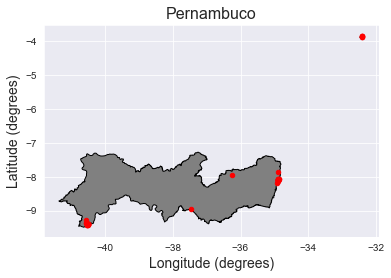

In [44]:
# Create the figure: PERNAMBUCO
# Create dataframe for state
d_pe_fixed = df_deleted_stations.loc[(df_deleted_stations["State"] == "PE")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
pe_lat_lon_points_fixed = [Point(xy) for xy in zip(d_pe_fixed["Lon_dd"], d_pe_fixed["Lat_dd"])]

# Create the geodataframe
pe_geo_lat_lon_fixed = gpd.GeoDataFrame(geometry=pe_lat_lon_points_fixed)

fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "PE"].plot(ax=ax, color="gray", edgecolor="black")
pe_geo_lat_lon_fixed.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Pernambuco", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"pernambuco_locations_fixed.png", dpi=300, bbox_inches="tight")
plt.show()
#plt.close()

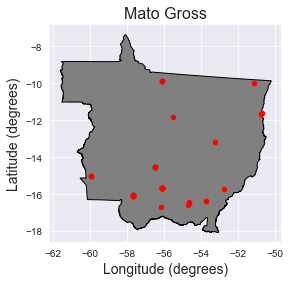

In [45]:
# Create the figure: MATO GROSSO
# Create dataframe for state
d_mt_fixed = df_deleted_stations.loc[(df_deleted_stations["State"] == "MT")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
mt_lat_lon_points_fixed = [Point(xy) for xy in zip(d_mt_fixed["Lon_dd"], d_mt_fixed["Lat_dd"])]

# Create the geodataframe
mt_geo_lat_lon_fixed = gpd.GeoDataFrame(geometry=mt_lat_lon_points_fixed)

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "MT"].plot(ax=ax, color="gray", edgecolor="black")
mt_geo_lat_lon_fixed.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Mato Gross", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"matogrosso_locations_fixed.png", dpi=300, bbox_inches="tight")
plt.show()
#plt.close()

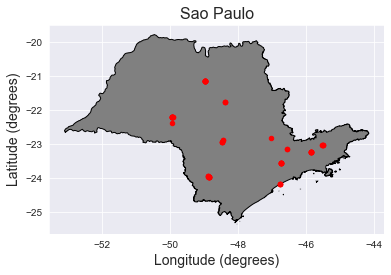

In [46]:
# Create the figure: SÃO PAULO
# Create dataframe for state
d_sp_fixed = df_deleted_stations.loc[(df_deleted_stations["State"] == "SP")]
#d_ro

# Define the geometry of the geodataframe using the lat and lon points from the previous dataframe
sp_lat_lon_points_fixed = [Point(xy) for xy in zip(d_sp_fixed["Lon_dd"], d_sp_fixed["Lat_dd"])]

# Create the geodataframe
sp_geo_lat_lon_fixed = gpd.GeoDataFrame(geometry=sp_lat_lon_points_fixed)
#am_geo_lat_lon

# Create the figure
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

gdf[gdf["SIGLA_UF"] == "SP"].plot(ax=ax, color="gray", edgecolor="black")
sp_geo_lat_lon_fixed.plot(ax=ax, marker="o", color="red", markersize=20, alpha=1)

# Details
ax.set_title("Sao Paulo", fontsize=16)
ax.set_xlabel("Longitude (degrees)", fontsize=14)
ax.set_ylabel("Latitude (degrees)", fontsize=14)
plt.savefig(figs_folder/"saopaulo_locations_fixed.png", dpi=300, bbox_inches="tight")
plt.show()
#plt.close()

## Save data file

In [47]:
df_final = df_deleted_stations.drop(columns=["lat_range_values", "lon_range_values"])
df_final.to_csv(output_folder / output_file, index=False)